<h1>CAPSTONE PROJECT: FINAL ASSIGNMENT</h1>

<p>As a part of media agency team, we often face issue of right targeting to our audiences. Suppose, we have a client, pharmacy
	company, that produces heartburn and indigestion drugs and want to grow audience in London. The company already has loyal users who suffers from such a deseases frequently. However, new media strategy suggest to attrackt new people who ocasionally faced such an issue, i.e. to grow Brand awareness among them. </p>
<p>There is an idea that people can ocasionally feel heartburn or indigestion after bars, restaurants and fast food, i.e. after places they can consume not healthy or exotic or simply not familiar food. So to reach new audience and introduce the Brand, the digital media campaign is pushed based on both user context search and geo place. The idea is to firstly pick suitable boroughs and then show advertisment to people in those boroughs with some keywords in their serch history. The target audience is Females 35-54 and Males 35-54. It is important to reach maximum possible people and both audiences at the same time (i.e. not only females or males). This project will cover first part of campaign, i.e. how to choose boroguhs based on their venues and demographic data. </p>
<p>The dataset I'm planning to use is foursquare venues database, as well as geospatial data of parts of city as well as number of population in each one.</p>

<h3> Dataset description </h3>
<ul>
<li>Foursquare venue set: dataset, containing vanues and their categories according to longitude and lattitude.</li>
<li>London boroughs geospatial data, provided by  <a href = "https://data.cdrc.ac.uk/dataset/london">CDRC (Customer Data Research Centre)</a>. This dataset contains polygons for each borough. </li>
<li>Population data for each borough, provided by  <a href = "https://data.london.gov.uk/dataset/small-populations-tables-household-tool">London Data Store</a>. This file contains CENSUS population data (age, gender, country of origin etc). for each Borough. The file itself is interactive, all data displayed are linked to database on hidden "date" spreadsheet. I copied this spreadsheeet to separate csv file called census_london.csv</li>
    

<h3> Part One: Obtain Datasets </h3>

In [74]:
import pandas as pd
from pandas.io.json import json_normalize
import numpy as np
import re
import json
import requests
from IPython.display import display, HTML

Import population Census dataset and see the structure:

In [2]:
population_dataset = pd.read_csv("census_london.csv",  encoding = "utf-8")
population_dataset.head()

C:\Users\Amalia\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3049: DtypeWarning: Columns (14) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


Code        Name      Sex  Country of Birth             Age  \
0  E12000001  North East  Females                 1    Age 16 to 34   
1  E12000001  North East  Females                 1    Age 35 to 54   
2  E12000001  North East  Females                 1    Age 55 to 64   
3  E12000001  North East  Females                 1  Age 65 or over   
4  E12000001  North East  Females                 1      Total: Age   

   NOT USED IN THIS DASHBOARD Name;Country of Birth;Sex;Age  \
0                                                NaN          
1                                                NaN          
2                                                NaN          
3                                                NaN          
4                                                NaN          

   All Household Representative Persons aged 16 or over  \
0                                              89651      
1                                             161893      
2                                              76769      
3                                             146906      
4                                             475219      

  One person household: Aged 65 and over One person household: Other  \
0                                      -                       18853   
1                                      -                       36320   
2                                      -                       32540   
3                                 103980                           -   
4                                 103980                       87713   

  One family only: All aged 65 and over  ...  \
0                                     -  ...   
1                                     -  ...   
2                                     -  ...   
3                                 20199  ...   
4                                 20199  ...   

   A; B; D; E Agriculture; energy and water  C Manufacturing  F Construction  \
0                                      2936             6941            2778   
1                                      3388            13200            4781   
2                                       906             3422            1378   
3                                       447              674             303   
4                                      7677            24237            9240   

   G; I Distribution; hotels and restaurants H; J Transport and communication  \
0                                      54603                             7798   
1                                      56244                            10290   
2                                      16430                             2170   
3                                       3053                              409   
4                                     130330                            20667   

   K; L; M; N Financial; Real Estate; Professional and Administrative activitvies  \
0                                              28158                                
1                                              35299                                
2                                               9181                                
3                                               1546                                
4                                              74184                                

  O Public administration and defence; compulsory social security P Education  \
0                                              12979                    22373   
1                                              27675                    42090   
2                                               6891                    12230   
3                                                655                     1547   
4                                              48200                    78240   

   Q Human health and social work activities  R; S; T; U Other  
0                                      40045             13695  
1                            

<p>As we can see, the dataset contains both raw data as well as subtotals (i.e. total age). Also we can see that there are lot's of columns defining groups of audiences, households, etc. I filtered this dataset to contain only Borough name, Sex (Males and Females) in columns, age group 35-54 with summarised all representatives of households (1st column of population)</p>

In [3]:
population_dataset = population_dataset.loc[(population_dataset['Age']=="Age 35 to 54") & \
                   (population_dataset['Sex']!='Persons')].filter(items=['Name', 'Sex', \
    'All Household Representative Persons aged 16 or over']).\
    rename(columns = {"All Household Representative Persons aged 16 or over":"Population"}).\
    groupby(['Name', 'Sex']).sum().reset_index().pivot(index = "Name", columns = "Sex", values = "Population")
population_dataset = population_dataset.reset_index()
population_dataset.columns = ['Borough', 'Females', 'Males']
population_dataset = population_dataset.set_index('Borough')
population_dataset.head()

Females   Males
Borough                              
Barking And Dagenham    42886   62245
Barnet                  71734  126869
Bexley                  44510   78214
Brent                   69570  108833
Bromley                 63913  110514

<p> So we got now dataset of population of Males and Females of Lonod Boroughs with age from 35 to 54. Let's now move to geojson file containing polygons (coordinated of borders)</p>

In [4]:
with open('london_boroughs_proper.geojson', encoding='utf-8') as fh:
    geo_data = json.load(fh)

df = json_normalize(geo_data["features"])
df.head()

geometry.coordinates geometry.type  \
0  [[[[0.148209, 51.599635], [0.148199, 51.599632...  MultiPolygon   
1  [[[[-0.183361, 51.668682], [-0.183383, 51.6687...  MultiPolygon   
2  [[[[0.158044, 51.509044], [0.156309, 51.509255...  MultiPolygon   
3  [[[[-0.212138, 51.555582], [-0.212689, 51.5560...  MultiPolygon   
4  [[[[0.076463, 51.430995], [0.075932, 51.431654...  MultiPolygon   

   properties.cartodb_id properties.created_at       properties.name  \
0                      1  2015-07-01T09:57:45Z  Barking and Dagenham   
1                      2  2015-07-01T09:57:45Z                Barnet   
2                      3  2015-07-01T09:57:45Z                Bexley   
3                      4  2015-07-01T09:57:45Z                 Brent   
4                      5  2015-07-01T09:57:45Z               Bromley   

  properties.updated_at     type  
0  2015-07-01T09:57:45Z  Feature  
1  2015-07-01T09:57:45Z  Feature  
2  2015-07-01T09:57:45Z  Feature  
3  2015-07-01T09:57:45Z  Feature  
4  2015-07-01T09:57:45Z  Feature

<p>We can see that for each Borough (in a row) all coordinates forming a Polygon are stored in one column. This column contain lists of longitude and latitude for each point, nested on other list or lists. Let's reshape data, so each point will now be stored is separate row with Borough names repeated correspondingly, as well as longitude and latitude stored in different columns. After that, filter our dataset to keep only Borough name and coordinates. To do so, we need list of depth 2 (longitude value and latitude value) in each cell. Let's write function that coerces all nested lists:</p>

In [5]:
def extend_children_lists(x, depth):
    depth = depth-1
    tempList = []
    for j in range(0, depth):
        for elem in x:
            tempList.extend(elem)
        x = tempList
        tempList = []
    return x

This is how it works:

In [6]:
print(extend_children_lists([['a','b','c'],['A','B','C']],2))
print(extend_children_lists([[[['a','b','c'],['A','B','C']]]],4))  
print(extend_children_lists([[[['a','b','c'],['A','B','C']]]],3))      

['a', 'b', 'c', 'A', 'B', 'C']
['a', 'b', 'c', 'A', 'B', 'C']
[['a', 'b', 'c'], ['A', 'B', 'C']]


So if we assign depth to depth-1, we obtain list with nested lists, i.e. list of depth 2: that is what we need!
What is depth of out coodinates lists?

In [7]:
depth = lambda L: isinstance(L, list) and max(map(depth, L))+1

In [8]:
print("min depth: " + str(min(df['geometry.coordinates'].apply(depth))))
print("max depth: " + str(max(df['geometry.coordinates'].apply(depth))))

min depth: 4
max depth: 4


So min depth is equal to max depth, so it same for entire dataset. Let's apply our function to dataframe. rename columns and selet only appropriate ones:

In [9]:
df['geometry.coordinates']=df['geometry.coordinates'].apply(extend_children_lists, args = (3,))
df.rename(columns = {"geometry.coordinates":"Coordinates", "properties.name":"Borough"}, inplace = True)
df = df.filter(items = ['Borough', 'Coordinates'])
df.head()

Borough                                        Coordinates
0  Barking and Dagenham  [[0.148209, 51.599635], [0.148199, 51.599632],...
1                Barnet  [[-0.183361, 51.668682], [-0.183383, 51.668742...
2                Bexley  [[0.158044, 51.509044], [0.156309, 51.509255],...
3                 Brent  [[-0.212138, 51.555582], [-0.212689, 51.556059...
4               Bromley  [[0.076463, 51.430995], [0.075932, 51.431654],...

To be able to merge forsquare dataset with demographic data, we need to be sure that Boroughs have the same names for both datasets:

In [10]:
print(population_dataset.index)
print(df['Borough'].values)

Index(['Barking And Dagenham', 'Barnet', 'Bexley', 'Brent', 'Bromley',
       'Camden', 'City Of London,Westminster', 'Croydon', 'Ealing',
       'East Midlands', 'East Of England', 'Enfield', 'England',
       'England And Wales', 'Greenwich', 'Hackney', 'Hammersmith And Fulham',
       'Haringey', 'Harrow', 'Havering', 'Hillingdon', 'Hounslow', 'Islington',
       'Kensington And Chelsea', 'Kingston Upon Tha', 'Lambeth', 'Lewisham',
       'London', 'Merton', 'Newham', 'North East', 'North West', 'Redbridge',
       'Richmond Upon Tha', 'South East', 'South West', 'Southwark', 'Sutton',
       'Tower Hamlets', 'Wales', 'Waltham Forest', 'Wandsworth',
       'West Midlands', 'Yorkshire and The Humber'],
      dtype='object', name='Borough')
['Barking and Dagenham' 'Barnet' 'Bexley' 'Brent' 'Bromley' 'Camden'
 'City of London' 'Croydon' 'Ealing' 'Enfield' 'Greenwich' 'Hackney'
 'Hammersmith and Fulham' 'Haringey' 'Harrow' 'Havering' 'Hillingdon'
 'Hounslow' 'Islington' 'Kensington and 

So we see that there are diffrences caused by lower/upper cases and that in population datset Westminster is included in City of London, while in geo data they are separated. 

In [11]:
df['Borough'] = df['Borough'].str.replace(' and ', " And ")
df['Borough'] = df['Borough'].str.replace(' upon ', " Upon ")
df["Borough"].loc[df['Borough']=="Westminster" ]="City Of London,Westminster"
df["Borough"].loc[df['Borough']=="City of London" ] = "City Of London,Westminster"
df = df.set_index('Borough')

as_list = population_dataset.index.tolist()
as_list[as_list.index('Kingston Upon Tha')] = "Kingston Upon Thames"
as_list[as_list.index('Richmond Upon Tha')] = "Richmond Upon Thames"

population_dataset.index = as_list

So let's see how two dataset merges with outer join:

In [12]:
population_dataset.join(df, how="outer")

Females     Males  \
Barking And Dagenham           42886     62245   
Barnet                         71734    126869   
Bexley                         44510     78214   
Brent                          69570    108833   
Bromley                        63913    110514   
Camden                         55588     80404   
City Of London,Westminster     60246     96672   
City Of London,Westminster     60246     96672   
Croydon                        87462    128202   
Ealing                         73419    123613   
East Midlands                 776911   1510902   
East Of England               966490   1986354   
Enfield                        73933    108003   
England                      9670477  17719933   
England And Wales           10210152  18645959   
Greenwich                      61746     89209   
Hackney                        67918     84347   
Hammersmith And Fulham         49955     66396   
Haringey                       70767     92136   
Harrow                         41585     86071   
Havering                       41338     77061   
Hillingdon                     51855     94480   
Hounslow                       52400     93292   
Islington                      57577     71684   
Kensington And Chelsea         43923     69420   
Kingston Upon Thames           29515     60039   
Lambeth                        88388    110368   
Lewisham                       81022     99143   
London                       1882398   2940228   
Merton                         43537     73879   
Newham                         64406    103274   
North East                    493528    809947   
North West                   1342845   2272889   
Redbridge                      52308     98530   
Richmond Upon Thames           39839     77731   
South East                   1462443   2966061   
South West                    863257   1698499   
Southwark                      83443    106022   
Sutton                         38192     71742   
Tower Hamlets                  47213     91917   
Wales                         539675    926026   
Waltham Forest                 60490     92351   
Wandsworth                     71720    107567   
West Midlands                 962960   1808168   
Yorkshire and The Humber      919645   1726885   

                                                                  Coordinates  
Barking And Dagenham        [[0.148209, 51.599635], [0.148199, 51.599632],...  
Barnet                      [[-0.183361, 51.668682], [-0.183383, 51.668742...  
Bexley                      [[0.158044, 51.509044], [0.156309, 51.509255],...  
Brent                       [[-0.212138, 51.555582], [-0.212689, 51.556059...  
Bromley                     [[0.076463, 51.430995], [0.075932, 51.431654],...  
Camden                      [[-0.140804, 51.56946], [-0.14081, 51.569463],...  
City Of London,Westminster  [[-0.083712, 51.520302], [-0.084142, 51.51962]...  
City Of London,Westminster  [[-0.110078, 51.515509], [-0.110099, 51.515475...  
Croydon                     [[-0.077495, 51.419915], [-0.077716, 51.419886...  
Ealing                      [[-0.334018, 51.55671], [-0.334456, 51.556808]...  
East Midlands                                                             NaN  
East Of England                                                           NaN  
Enfield                     [[-0.010576, 51.68107], [-0.012408, 51.681142]...  
England                                                                   NaN  
England And Wales                                                         NaN  
Greenwich                   [[0.076264, 51.432359], [0.076795, 51.432635],...  
Hackney                     [[-0.015686, 51.552566], [-0.015883, 51.553571...  
Hammersmith And Fulham      [[-0.22712, 51.530647], [-0.227244, 51.530564]...  
Haringey                    [[-0.040177, 51.605884], [-0.041268, 51.606051...  
Harrow                      [[-0.302992, 51.636567], [-0.302949, 51.636643...  
Havering                    [[0.311629, 51.56578

<p>All cases with NaN are where we have population data but no coordinate data, no vice versa cases. It means, that we covered all cases where same Boroughs could have different spelling and existing NaN are true missings</p>
<p>Next data reshaping is assisiated on API calls to Forsquare. Unfortunately, there is no option to define polygon to search venues inside precisely. However, there are parameters <i>ne</i> and <i>se</i> that define northeast and southwest points correspondingly. Using these points firsquare returns venues inside boundary box where these two points are vertices of the box. 
<p> To obtain required points we need max and min latitudes and longitudes for each Borough. We need actually categories, not venues itself. For most of venues categories are provided, but not for all, so we will retreive both venues' names and categories</p>


In [13]:
coords = df.reset_index()
coords_spreaded = pd.DataFrame(coords.apply(lambda x: pd.Series(x['Coordinates']),axis=1).stack()).reset_index().\
                            set_index(['level_0']).rename(columns = {"level_0":"index", 0:"Coordinates"}).filter(items=['index', 'Coordinates'])

coords = coords_spreaded['Coordinates'].apply(pd.Series).rename(columns = {0:"latitude", 1:"longitude"}).\
          join(coords["Borough"]).groupby("Borough")['longitude', 'latitude'].agg([('Min' , 'min'), ('Max', 'max')]) 
coords.columns = ['longitude_min', 'longitude_max', 'latitude_min', 'latitude_max']

coords = coords.reset_index()
coords.head()

Borough  longitude_min  longitude_max  latitude_min  \
0  Barking And Dagenham      51.508935      51.599635      0.068314   
1                Barnet      51.555332      51.670362     -0.304006   
2                Bexley      51.408644      51.515715      0.076264   
3                 Brent      51.527833      51.600559     -0.333999   
4               Bromley      51.289504      51.444511     -0.079547   

   latitude_max  
0      0.191825  
1     -0.127535  
2      0.225322  
3     -0.189883  
4      0.163993

Let's call to forsquare API and get up to 100 venues for each Borough:

In [14]:
CLIENT_ID = "..."
CLIENT_SECRET = "..."
VERSION = '20180605' # Foursquare API version
LIMIT = 100

In [15]:
def get_category(response):
    if len(response['categories'])>0:
        return response['categories'][0]['shortName'] 
    else:
        return "-"

In [16]:
def forsqure_venues_box(boroughs, min_latitude, min_longitude, max_latitude, max_longitude):
    venues_list=[]
    for borough, min_lat, min_lng, max_lat, max_lng in zip(boroughs, min_latitude, min_longitude, max_latitude, max_longitude):
        url = 'https://api.foursquare.com/v2/venues/search?&client_id={}&client_secret={}&ne={}%2C{}&sw={}%2C{}&intent=browse&limit=100&v={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            min_lat,
            min_lng,
            max_lat,
            max_lng,
            VERSION)
        # make the GET request    
        results = requests.get(url).json()["response"]['venues']
        # return only relevant information for each nearby venue
        venues_list.append([(
            borough, 
            v['name'],
            get_category(v)) for v in results])
        
    output = pd.DataFrame([item for venue_list in venues_list for item in venue_list])    
    output.columns = ['Borough', 'Venue', 'Category']
    return(output)

In [30]:
venues_df= forsqure_venues_box(boroughs = coords["Borough"].values, min_latitude = coords['longitude_min'].values, \
                    min_longitude=coords['latitude_min'].values, max_latitude = coords['longitude_max'].values, 
                    max_longitude=coords['latitude_max'].values)

In [31]:
venues_df.head()

Borough              Venue       Category
0  Barking And Dagenham     Martins Corner          Plaza
1  Barking And Dagenham         Co-op Food  Grocery Store
2  Barking And Dagenham        Cherry Tree            Pub
3  Barking And Dagenham  Chameleons Tattoo         Tattoo
4  Barking And Dagenham        Family Cafe              -

Let's take a look on returned categories:

In [32]:
Categories = sorted(venues_df['Category'].unique())

for i in range(0, len(Categories), 5):
    print ("| ".join([str(v + "\t") for v in Categories[i:i+5]]))

-	| Academic Building	| Accessories	| Administrative Building	| Advertising Agency	
Afghan	| African	| American	| Animal Shelter	| Antiques	
Apparel	| Art Gallery	| Art Museum	| Art Studio	| Arts & Crafts	
Arts & Entertainment	| Asian	| Assisted Living	| Athletics & Sports	| Auditorium	
Auto Dealer	| Auto Garage	| Auto Workshop	| Automotive	| B & B	
BBQ	| Bagels	| Bakery	| Bank	| Bar	
Baseball Field	| Basketball Court	| Beer Bar	| Beer Garden	| Beer Store	
Betting Shop	| Bike	| Bike Shop	| Bike Trail	| Billiards	
Boarding	| Boat / Ferry	| Bookstore	| Boutique	| Bowling Alley	
Boxing Gym	| Brazilian	| Breakfast	| Brewery	| Bridge	
Building	| Burgers	| Bus	| Bus Station	| Bus Stop	
Business Center	| Business Services	| Butcher	| Cafeteria	| Café	
Campground	| Canal	| Canal Lock	| Candy Store	| Car Washes	
Caribbean	| Carpet Store	| Casino	| Castle	| Cemetery	
Cheese Shop	| Chinese	| Chocolate Shop	| Church	| Cineplex	
Circus	| City Hall	| Classroom	| Climbing Gym	| Club	
Cocktail	| Coffe

<p> Categories like: Pub, Restaurant, Salad, Breakfast, Beer/Beer Bar, Cupcakes, Dessert, Diner, Doner, Fastfood, Ice Cream, Sandwiches, Steakhouse, Tacos can be generalized to Restaurants as well as categories, contating words like Chiken and Fish.</p> 
<p> Also we can see there are lot's of categories named by countries and continents: Asian, Italian, European. What venues are inside these categories? Most of them ends on "an" or except Greek, Chinese, Vietnamese, French, English</p>

In [33]:
venues_df.loc[venues_df['Category'].str.contains(".an$")]

Borough                               Venue  \
59          Barking And Dagenham                          Dinner box   
61          Barking And Dagenham                       Chandni Chowk   
65          Barking And Dagenham                              Shapla   
157                       Barnet                           Tootoomoo   
165                       Barnet                        Metro Piazza   
382                      Bromley                           The Plaza   
399                      Bromley                              Yasmin   
404                      Bromley                              Indigo   
449                       Camden                                 Oka   
469                       Camden  J (ristorante, pizzeria, italiano)   
470                       Camden                           J's Pizza   
472                       Camden                     Cucina Italiana   
555   City Of London,Westminster                              Sketch   
568   City Of London,Westminster                          Lucknow 49   
574   City Of London,Westminster           Beboz Italian Street Food   
589   City Of London,Westminster                       Pucci Mayfair   
596   City Of London,Westminster                        Il Pan D'oro   
609   City Of London,Westminster                             Lucknow   
624   City Of London,Westminster          Ciao - Italian Street Food   
727                      Croydon                                 805   
834                       Ealing                        Silver Spoon   
888                      Enfield                          The Grange   
909                      Enfield                        The Poppadom   
913                      Enfield                Grange Park Tandoori   
914                      Enfield                            Nelito's   
985                    Greenwich                  Pow-lina's Kitchen   
988                    Greenwich                  Well Hall Tandoori   
1026                   Greenwich                            Cafe Raj   
1086                     Hackney                   Yum Yum Carribean   
1099                     Hackney                         Jerk Corner   
...                          ...                                 ...   
2365                      Newham                              Chilli   
2391                      Newham                            Kalavara   
2399                      Newham       Aasai Dosai Indian Restaurant   
2456                   Redbridge               Fat Joe's Sports Cafe   
2472                   Redbridge                       Oriental Chef   
2483                   Redbridge                         Mason Frais   
2484                   Redbridge                              Abshar   
2485                   Redbridge                      Sambal Express   
2487                   Redbridge                               Spice   
2503                   Redbridge                            Thayakam   
2520        Richmond Upon Thames                    Hansel & Pretzel   
2562        Richmond Upon Thames                      Saqui Tandoori   
2567        Richmond Upon Thames                    Jaflong Tandoori   
2625                   Southwark                 Cravings La Carreta   
2659                   Southwark                     Grassroots cafe   
2660                   Southwark                               lolak   
2667                   Southwark           Ganapati Takeaway Kitchen   
2672                   Southwark  Tasty African Restuarant (Peckham)   
2681                   Southwark                              Artusi   
2700                   Southwark                       Niall's Place   
2732                      Sutton                   Vinoteca Italiana   
2765                      Sutton                           Clay Oven   
2774                      Sutton                            Saregama   
2807                      Sutton                      Spaghetti T

We can see that almost all of them are restaurants, so let's convert their categories to Restaurant. What about venues that are not classified by Foursquare?

In [34]:
print(venues_df['Venue'].loc[venues_df['Category']=="-"].unique())

['Family Cafe' 'The Aspire National Training Centre' 'Tashas doctors'
 'Bus stop' 'Opia hair and beauty' 'Five Elms Health Centre'
 "The Swainsbury's x" 'Top Chicken And Kebab' 'a barn dance.'
 'The nail shop' 'Elms cafe' 'Dagenham Delivery Office' 'Parkside Nursery'
 'Blockages' 'Osborn Gardens' 'BP Connect' 'Fired Treasures Ltd'
 'Olympus Fish Restaurant' 'Kosher cuisine' 'El Vaquero' 'Looking Good'
 'The lions den cafe' 'The Misty Moon' 'Collins' 'Poplar Grove Centre'
 'Neary Family' 'Rubicon' 'Brent Park. Ind Estate Wembley' 'Eu signs'
 'Brent Oil Contractors Ltd' 'Raj' 'Church Of Christ'
 'Locksbottom Cricket Club' 'Keston car care' 'Annies Supper Club'
 'the boutique spa' 'Drink Me Chai' 'The Wylde Side II' 'EDC Bromley'
 'The Tally Ho Pub' 'Hilda Vale Road' 'Lisa Hauck' 'Bohemia'
 'Pamela Shiffer' 'Sesame' "Slinky's" 'Gorilla Organization HQ'
 'David Birkett Estate Agents' 'Italian Deli' 'Provost Road' 'Number 5'
 'Gasol plc' 'Aramid' 'Gymboree' 'Doves Volvo'
 'Phoenix Schools o

<p>So venues contaning "cafe" also can be generalized to Restaurants.</p>
<p>To sum up, these are criteria to assign category "Restaurant" to venue:<ul>
    <li>Category is one of Pub, Cafe, Steakhouse etc</li>
    <li>Category is representing country/continent: English, Chinese, Greek, etc</li>
    <li>Category contains marker words, such as fish, pizza, chiken, kebab</li>
    <li>Category is missing but venue name contains marker words</li>


In [35]:
#coerce categories to Resturant
venues_df['Category'].loc[(venues_df['Category'].str.contains("Pub") | venues_df['Category'].str.contains("Salad") | 
                         venues_df['Category'].str.contains("Breakfast") | venues_df['Category'].str.contains("Dessert") | 
                         venues_df['Category'].str.contains("Diner") | venues_df['Category'].str.contains("Doner") | 
                         venues_df['Category'].str.contains("Fast Food") | venues_df['Category'].str.contains("Ice Cream") |
                         venues_df['Category'].str.contains("Sandwiches") | venues_df['Category'].str.contains("Steakhouse") |
                         venues_df['Category'].str.contains("Beer Bar") | venues_df['Category'].str.contains("Cafe") |
                         venues_df['Category'].str.contains("Coffe"))] = "Restaurant" 


#criteria for country
venues_df['Category'].loc[venues_df['Category'].str.contains(".an$")]="Restaurant"
venues_df['Category'].loc[venues_df['Category'].isin(['Greek', 'Chinese', 'Vietnamese', \
                                                      'French', 'English', "Japanese"])] = "Restaurant"
#marker words in category
venues_df['Category'].loc[venues_df['Category'].str.contains('Fish')] = "Restaurant"
venues_df['Category'].loc[venues_df['Category'].str.contains('Pizza')] = "Restaurant" 
venues_df['Category'].loc[venues_df['Category'].str.contains('Chiken')] = "Restaurant"              
#marker words in venues
venues_df['Category'].loc[venues_df['Venue'].str.lower().str.contains('fish')] = "Restaurant"
venues_df['Category'].loc[venues_df['Venue'].str.lower().str.contains('chiken')] = "Restaurant"
venues_df['Category'].loc[venues_df['Venue'].str.lower().str.contains('kebab')] = "Restaurant"
venues_df['Category'].loc[venues_df['Venue'].str.lower().str.contains('cafe')] = "Restaurant"

Let's calculate quantity of restaurants in suggested venues for each Borough:

In [36]:
venues_df = venues_df.filter(items=['Borough', 'Category']).loc[venues_df['Category']=="Restaurant"].\
                                groupby('Borough').agg('count')
venues_df.head()

Category
Borough                       
Barking And Dagenham        13
Barnet                      13
Bexley                       8
Brent                        8
Bromley                     15

Now we have data about our targer audience, percentage of restaurants in each borough. Let's merge altogether:

In [37]:
df_for_clustering = venues_df.join(population_dataset).reset_index()
df_for_clustering.head()

Borough  Category  Females   Males
0  Barking And Dagenham        13    42886   62245
1                Barnet        13    71734  126869
2                Bexley         8    44510   78214
3                 Brent         8    69570  108833
4               Bromley        15    63913  110514

<p>Finally, let's find optimum number of clusters (by incresing number of clusters untill SSE stops reducing significantly and Silhouette scoure stops increase significantly) and see what are obtained clusters:</p>

In [39]:
import folium
from sklearn.cluster import KMeans
import matplotlib.cm as cm
import matplotlib.colors as colors
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
from sklearn.metrics import silhouette_score

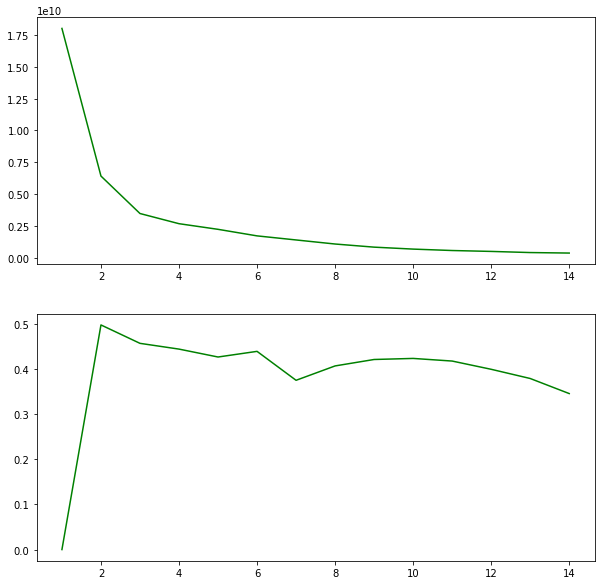

In [44]:
Ks = 15
SSE = np.zeros(14)
Silhouette_Coef = np.zeros(14)
#loop to store results from different quantity of negbors
for i in range(1,Ks,1):
    kmeans = KMeans(n_clusters=i, random_state=0).fit(df_for_clustering.reset_index().drop("Borough",1))
    SSE[i-1] = kmeans.inertia_
    if(i>1):
        Silhouette_Coef[i-1] = silhouette_score(df_for_clustering.reset_index().drop("Borough",1), kmeans.labels_, \
                                            metric='euclidean')
    
#plot results of several estimations
plt.figure(figsize=(10,10))
plt.subplot(2, 1, 1)
plt.plot(range(1,Ks), SSE,'g')
plt.subplot(2, 1, 2)
plt.plot(range(1,Ks), Silhouette_Coef,'g')
 

<p>Optimum number of clusters in this case is 3. Let's merge cluster labels to data and see mean quantity of Restaurants (Category) and mean presence of audieces:</p>

In [47]:
kmeans = KMeans(n_clusters=3, random_state=0).fit(df_for_clustering.drop("Borough",1))
df_for_clustering['Cluster_label'] = kmeans.labels_ + 1
df_for_clustering.groupby("Cluster_label").agg('mean')

Category       Females          Males
Cluster_label                                        
1              15.909091  42987.000000   72225.636364
2              15.500000  76460.400000  112913.400000
3              14.181818  58630.636364   92419.272727

We see that category is so broad, that main difference among clusters is audience: cluster number two contains maximum for both audiences, therefore, it could be suggested cluster to  set as target location in campaign. Finally, let's look on the map how audience quantity varies among boroughs and how boroughs are grouped to clusters:

<font size="3" color="red">Please note, that Folium maps are not shown via GitHub correctly, so, below are also screenshots of maps</font>

In [59]:
import folium
f = folium.Map([51.5119, 0], zoom_start=9, tiles='cartodbpositron')
folium.Choropleth(geo_data, data=df_for_clustering, columns=["Borough", 'Females'], \
                  fill_color='BuPu', 
                  legend_name='Females 35-54',
                  key_on='feature.properties.name').add_to(f)
f

In [83]:
display(HTML('<img src="img/map1.png" alt="Females 34-45 accross Boroughs:">'))

In [60]:
m = folium.Map([51.5119, 0], zoom_start=9, tiles='cartodbpositron')
folium.Choropleth(geo_data, data=df_for_clustering, columns=["Borough", 'Males'], \
                  fill_color='BuPu', 
                  legend_name='Males 35-54',
                  key_on='feature.properties.name').add_to(m)
m

In [84]:
display(HTML('<img src="img/map2.png" alt="Males 34-45 accross Boroughs:">'))

In [64]:
c = folium.Map([51.5119, 0], zoom_start=9, tiles='cartodbpositron')
folium.Choropleth(geo_data, data=df_for_clustering.reset_index(), columns=["Borough", 'Cluster_label'], \
                  fill_color='BuPu', 
                  legend_name='Clusters',
                  key_on='feature.properties.name').add_to(c)
c

In [85]:
display(HTML('<img src="img/map3.png" alt="Clusters accross Boroughs:">'))

We can see that cluster two, going from north to south of London has maximum of both of target audiences and, therefore, can be suggested. Here is a list of Boroughs belonging to this cluster as final outcome:

In [67]:
print(df_for_clustering['Borough'].loc[df_for_clustering['Cluster_label']==2])

1         Barnet
3          Brent
4        Bromley
7        Croydon
8         Ealing
9        Enfield
21       Lambeth
22      Lewisham
27     Southwark
31    Wandsworth
Name: Borough, dtype: object


Thanks!